In [1]:
import sys
sys.path.append(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\module_memoire")

# Adds the directory path containing custom Python modules
# This allows for easy import of modules or packages stored in this directory

In [2]:
import pandas as pd
from exploratory_analysis import *
from dependency_plot import *
from to_compute_model import *
from to_concatenate import *
from to_display_data import *
from to_resample import *
from preprocessing import *
from evaluation import *
from joblib import dump,load

C:\Users\Ninette HOUKPONOU\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


# Random with all data

In [3]:
model_resume=import_data(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\model_resume.csv") # excel file to save all computations
data=import_data(r"C:\Users\Ninette HOUKPONOU\Repertoire_python\Memoire\new_data\full_data.csv")

In [4]:
df1=data.copy()

In [5]:
df1.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# SPLIT

In [6]:
x_all_train,x_all_test, y_all_train, y_all_test=separation_of_train_test(df1,"stroke",size_=0.3)

# Standardization

In [7]:
all_standar_train=x_all_train[["age","avg_glucose_level","bmi"]]
all_standar_test=x_all_test[["age","avg_glucose_level","bmi"]]
all_standar_train,scaler=to_standardized(all_standar_train)
all_standar_test=scaler.transform(all_standar_test)
all_standar_test=pd.DataFrame(all_standar_test,columns=all_standar_train.columns)

In [8]:
x_all_train=to_concatenate(x_all_train,all_standar_train)
x_all_test=to_concatenate(x_all_test,all_standar_test)

In [9]:
x_all_train.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi
0,Female,0,0,Yes,Private,Urban,Unknown,0.353027,0.122649,0.255747
1,Male,0,0,No,children,Urban,Unknown,0.157715,0.128198,0.293103
2,Female,0,0,Yes,Govt_job,Urban,Unknown,0.682617,0.145551,0.528736
3,Male,0,0,Yes,Self-employed,Rural,smokes,0.365234,0.187594,0.522989
4,Female,0,0,Yes,Private,Urban,formerly smoked,0.853516,0.166337,0.425287


# Model

In [ ]:
model_all=compute_model("rdf",x_all_train,y_all_train)
sum_up=evaluation_of_model(model_all,x_all_test,y_all_test,"RandomForest_all_9_08",model_resume)

# Test with smote

In [51]:
dump(value=model_all,filename="rdf_all_9_08.pkl")

['rdf_all_9_08.pkl']

In [53]:
loaded_all_rdf=load(filename="rdf_all_9_08.pkl")

In [54]:
x_all_test_resampled,y_all_test_resampled,resampler_all=resampling_data(x_all_test,y_all_test,"SMOTE")

In [56]:
sum_up=evaluation_of_model(loaded_all_rdf,x_all_test_resampled,y_all_test_resampled,"Random_alldata_smoted_9_08",model_resume)

              precision    recall  f1-score   support

           0       0.88      0.70      0.78      1421
           1       0.75      0.91      0.82      1421

    accuracy                           0.80      2842
   macro avg       0.82      0.80      0.80      2842
weighted avg       0.82      0.80      0.80      2842



# Dependency plots

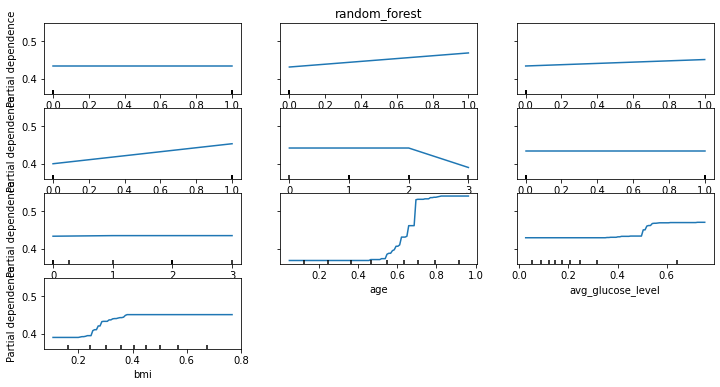

In [80]:
plot_dependencing(loaded_all_rdf,x_all_train,"random_forest",features=x_all_train.columns)

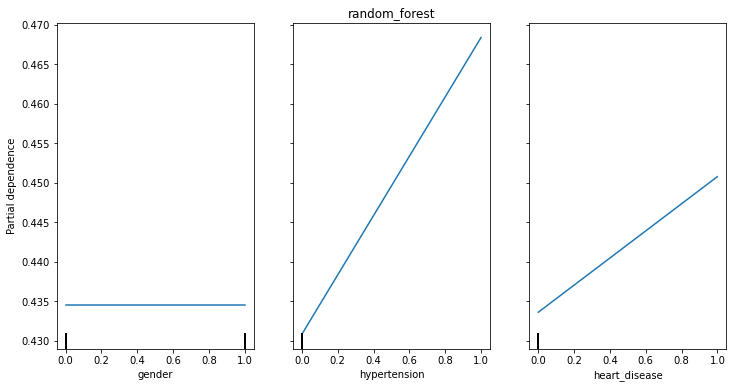

In [85]:
plot_dependencing(loaded_all_rdf,x_all_train,"random_forest",features=['gender','hypertension','heart_disease'])

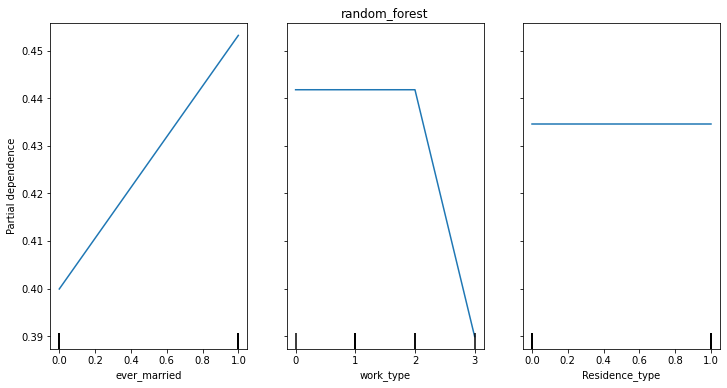

In [83]:
plot_dependencing(loaded_all_rdf,x_all_train,"random_forest",features=['ever_married','work_type','Residence_type'])

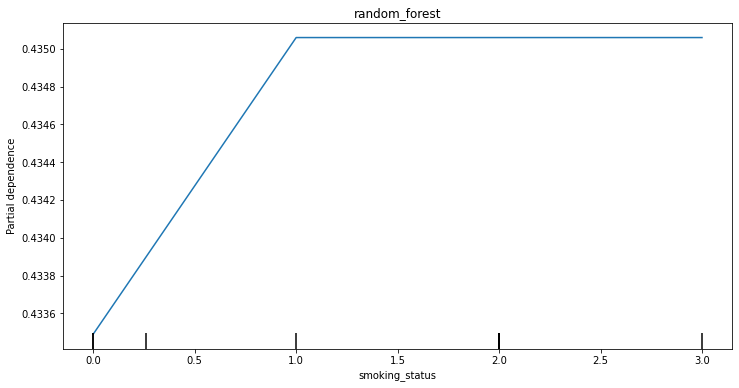

In [86]:
plot_dependencing(loaded_all_rdf,x_all_train,"random_forest",features=['smoking_status'])

# Random with feature selection

In [11]:
df=data.copy()

# Var encoding

In [12]:
for col in df.select_dtypes("object"):
    df=to_encoded(df,col)

In [23]:
lqtex=df.head().to_latex(index=False)
print(lqtex)

\begin{tabular}{rrrrrrrrrrr}
\toprule
gender & age & hypertension & heart_disease & ever_married & work_type & Residence_type & avg_glucose_level & bmi & smoking_status & stroke \\
\midrule
1 & 67.000000 & 0 & 1 & 1 & 1 & 1 & 228.690000 & 36.600000 & 1 & 1 \\
1 & 80.000000 & 0 & 1 & 1 & 1 & 0 & 105.920000 & 32.500000 & 2 & 1 \\
0 & 49.000000 & 0 & 0 & 1 & 1 & 1 & 171.230000 & 34.400000 & 3 & 1 \\
0 & 79.000000 & 1 & 0 & 1 & 2 & 0 & 174.120000 & 24.000000 & 2 & 1 \\
1 & 81.000000 & 0 & 0 & 1 & 1 & 1 & 186.210000 & 29.000000 & 1 & 1 \\
\bottomrule
\end{tabular}



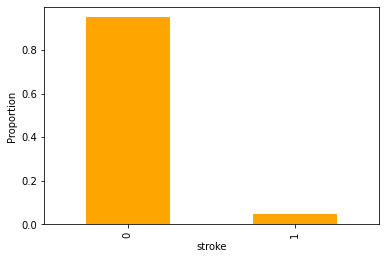

In [33]:
df.stroke.value_counts(normalize=True).plot(kind="bar", color="orange")
plt.ylabel("Proportion")
plt.show()

# SPLIT

In [14]:
x_train,x_test, y_train, y_test=separation_of_train_test(df,"stroke",size_=0.3)

# Standardization

In [15]:
standar_train=x_train[["age","avg_glucose_level","bmi"]]
standar_test=x_test[["age","avg_glucose_level","bmi"]]
standar_train,scaler=to_standardized(standar_train)
standar_test=scaler.transform(standar_test)
standar_test=pd.DataFrame(standar_test,columns=standar_train.columns)

In [16]:
x_train=to_concatenate(x_train,standar_train)
x_test=to_concatenate(x_test,standar_test)

# Features selection

In [17]:
x_train.head()

,gender,hypertension,heart_disease,ever_married,work_type,Residence_type,smoking_status,age,avg_glucose_level,bmi
0,0,0,0,1,1,1,0,0.353027,0.122649,0.255747
1,1,0,0,0,3,1,0,0.157715,0.128198,0.293103
2,0,0,0,1,0,1,0,0.682617,0.145551,0.528736
3,1,0,0,1,2,0,3,0.365234,0.187594,0.522989
4,0,0,0,1,1,1,1,0.853516,0.166337,0.425287


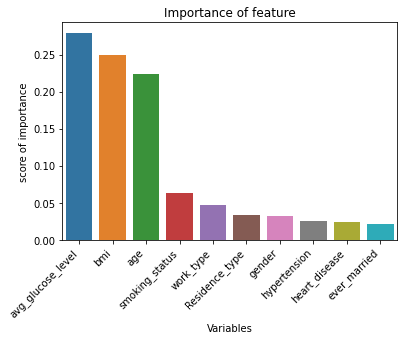

In [18]:
x_train,x_test=features_selection(x_train,x_test,y_train,seuil=0.05)

In [19]:
x_train.head()

,avg_glucose_level,bmi,age,smoking_status
0,0.122649,0.255747,0.353027,0
1,0.128198,0.293103,0.157715,0
2,0.145551,0.528736,0.682617,0
3,0.187594,0.522989,0.365234,3
4,0.166337,0.425287,0.853516,1


In [21]:


# Exportez le DataFrame au format LaTeX
latex_code =x_train.head().to_latex(index=False)

# Affichez le code LaTeX
print(latex_code)

\begin{tabular}{rrrr}
\toprule
avg_glucose_level & bmi & age & smoking_status \\
\midrule
0.122649 & 0.255747 & 0.353027 & 0 \\
0.128198 & 0.293103 & 0.157715 & 0 \\
0.145551 & 0.528736 & 0.682617 & 0 \\
0.187594 & 0.522989 & 0.365234 & 3 \\
0.166337 & 0.425287 & 0.853516 & 1 \\
\bottomrule
\end{tabular}



# Model

In [28]:
model=compute_model("rdf",x_train,y_train)
sum_up=evaluation_of_model(model,x_test,y_test,"RandomForest_28_06",model_resume)

Do you want to enter the params. Y/Nn
              precision    recall  f1-score   support

           0       0.99      0.71      0.83      1421
           1       0.14      0.89      0.24        74

    accuracy                           0.72      1495
   macro avg       0.57      0.80      0.54      1495
weighted avg       0.95      0.72      0.80      1495



In [29]:
dump(value=model,filename="rdf_28_06.pkl")

['rdf_28_06.pkl']

# Test with smote

In [30]:
loaded_rdf=load(filename="rdf_28_06.pkl")

In [17]:
x_test_resampled,y_test_resampled,resampler=resampling_data(x_test,y_test,"SMOTE")

In [32]:
sum_up=evaluation_of_model(loaded_rdf,x_test_resampled,y_test_resampled,"Random_data_smoted_28_06",model_resume)

              precision    recall  f1-score   support

           0       0.90      0.71      0.80      1421
           1       0.76      0.92      0.83      1421

    accuracy                           0.82      2842
   macro avg       0.83      0.82      0.81      2842
weighted avg       0.83      0.82      0.81      2842



# Dependency Plot

In [33]:
features=['avg_glucose_level', 'bmi' ,'age']

In [34]:
features

['avg_glucose_level', 'bmi', 'age']

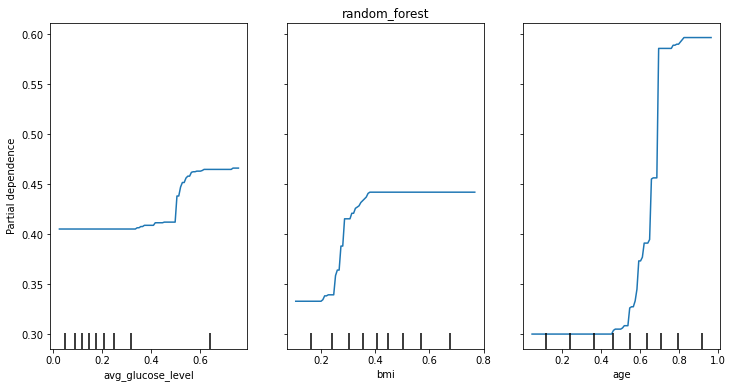

In [35]:
plot_dependencing(loaded_rdf,x_train,"random_forest",features)

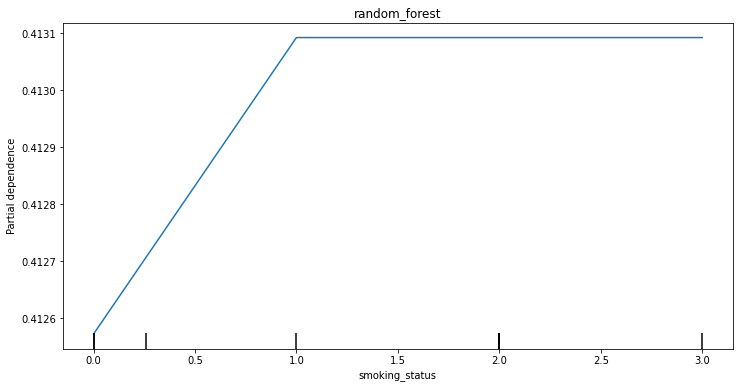

In [87]:
plot_dependencing(loaded_rdf,x_train,"random_forest",features=['smoking_status'])

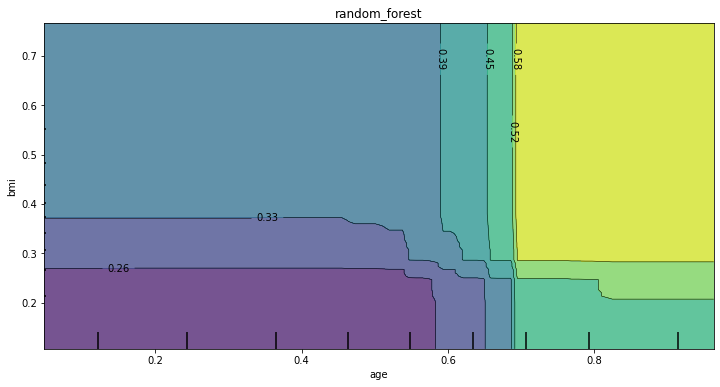

In [36]:
plot_dependencing(loaded_rdf,x_train,"random_forest",features=[('age','bmi')])

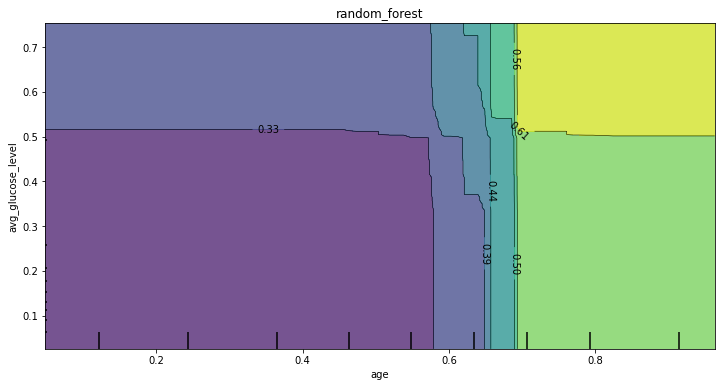

In [37]:
plot_dependencing(loaded_rdf,x_train,"random_forest",features=[('age','avg_glucose_level')])

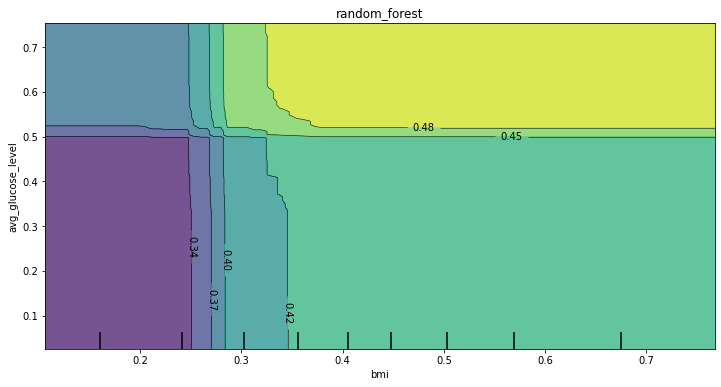

In [38]:
plot_dependencing(loaded_rdf,x_train,"random_forest",features=[('bmi','avg_glucose_level')])

## fine tuning model random with feature selection

In [14]:
model_tune=compute_model("rdf",x_train,y_train)
sum_up=evaluation_of_model(model_tune,x_test,y_test,"RandomForest_tune_28_06",model_resume)

Do you want to enter the params. Y/NY
enter the list of n_estimators that you want to test separated by espace : 100 200 300 400 500
enter the list of min_samples_split that you want to test separated by espace : 5 10 15 20 30
enter the list of max_leaf_nodes that you want to test separated by espace : 2 3 4 5 6 7 8 9 10
enter the list of max_leaf_nodes that you want to test separated by espace : 10 20 30 40 50
{'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [5, 10, 15, 20, 30], 'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10], 'max_depth': [10, 20, 30, 40, 50]}
              precision    recall  f1-score   support

           0       0.99      0.75      0.85      1421
           1       0.14      0.80      0.24        74

    accuracy                           0.76      1495
   macro avg       0.57      0.78      0.55      1495
weighted avg       0.94      0.76      0.82      1495



In [17]:
sum_up=evaluation_of_model(model_tune,x_test_resampled,y_test_resampled,"Random_tune_data_smoted_28_06",model_resume)

              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1421
           1       0.78      0.86      0.82      1421

    accuracy                           0.81      2842
   macro avg       0.81      0.81      0.81      2842
weighted avg       0.81      0.81      0.81      2842



In [18]:
model_tune.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 19.03448275862069}, max_depth=10,
                       max_leaf_nodes=10, min_samples_split=5, n_estimators=300,
                       n_jobs=-1, random_state=1234)

In [15]:
model_tune=compute_model("rdf",x_train,y_train)
sum_up=evaluation_of_model(model_tune,x_test,y_test,"RandomForest_tune_28_06",model_resume)

Do you want to enter the params. Y/NY
enter the list of n_estimators that you want to test separated by espace : 100 200 300 400 500
enter the list of min_samples_split that you want to test separated by espace : 2 3 5 10
enter the list of max_leaf_nodes that you want to test separated by espace : 8 10 12 15 
enter the list of max_leaf_nodes that you want to test separated by espace : 5 7 8 10 15
{'n_estimators': [100, 200, 300, 400, 500], 'min_samples_split': [2, 3, 5, 10], 'max_leaf_nodes': [8, 10, 12, 15], 'max_depth': [5, 7, 8, 10, 15]}
              precision    recall  f1-score   support

           0       0.98      0.79      0.88      1421
           1       0.16      0.74      0.26        74

    accuracy                           0.79      1495
   macro avg       0.57      0.77      0.57      1495
weighted avg       0.94      0.79      0.85      1495



In [18]:
sum_up=evaluation_of_model(model_tune,x_test_resampled,y_test_resampled,"Random_tune_data_smoted_28_06",model_resume)

              precision    recall  f1-score   support

           0       0.80      0.79      0.79      1421
           1       0.79      0.80      0.80      1421

    accuracy                           0.80      2842
   macro avg       0.80      0.80      0.80      2842
weighted avg       0.80      0.80      0.80      2842



In [19]:
model_tune.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 19.03448275862069}, max_depth=15,
                       max_leaf_nodes=15, min_samples_split=5, n_estimators=500,
                       n_jobs=-1, random_state=1234)

In [20]:
model_tune=compute_model("rdf",x_train,y_train)
sum_up=evaluation_of_model(model_tune,x_test,y_test,"RandomForest_tune_28_06",model_resume)

Do you want to enter the params. Y/NY
enter the list of n_estimators that you want to test separated by espace : 400 500 700 800 1000
enter the list of min_samples_split that you want to test separated by espace : 2 3 5 10
enter the list of max_leaf_nodes that you want to test separated by espace : 12 15 20 30 40 50
enter the list of max_leaf_nodes that you want to test separated by espace : 10 15 20 30 50 100
{'n_estimators': [400, 500, 700, 800, 1000], 'min_samples_split': [2, 3, 5, 10], 'max_leaf_nodes': [12, 15, 20, 30, 40, 50], 'max_depth': [10, 15, 20, 30, 50, 100]}
              precision    recall  f1-score   support

           0       0.97      0.90      0.93      1421
           1       0.18      0.42      0.25        74

    accuracy                           0.87      1495
   macro avg       0.57      0.66      0.59      1495
weighted avg       0.93      0.87      0.90      1495



In [21]:
model_tune.best_estimator_

RandomForestClassifier(class_weight={0: 1, 1: 19.03448275862069}, max_depth=20,
                       max_leaf_nodes=50, min_samples_split=10,
                       n_estimators=500, n_jobs=-1, random_state=1234)

In [22]:
sum_up=evaluation_of_model(model_tune,x_test_resampled,y_test_resampled,"Random_tune_data_smoted_28_06",model_resume)

              precision    recall  f1-score   support

           0       0.60      0.90      0.72      1421
           1       0.79      0.39      0.53      1421

    accuracy                           0.65      2842
   macro avg       0.70      0.65      0.62      2842
weighted avg       0.70      0.65      0.62      2842



# Model with numerical var alone

In [97]:
df3=data.copy()
df3.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [102]:
df3=df3[['age','bmi','avg_glucose_level','stroke']]

In [103]:
df3.head()

,age,bmi,avg_glucose_level,stroke
0,67.0,36.6,228.69,1
1,80.0,32.5,105.92,1
2,49.0,34.4,171.23,1
3,79.0,24.0,174.12,1
4,81.0,29.0,186.21,1


## Split

In [104]:
x_train3,x_test3, y_train3, y_test3=separation_of_train_test(df3,"stroke",size_=0.3)

## Standardization

In [105]:
standar_train3,scaler3=to_standardized(x_train3)
standar_test3=scaler3.transform(x_test3)
standar_test3=pd.DataFrame(standar_test3,columns=standar_train3.columns)

# model

In [107]:
model3=compute_model("rdf",standar_train3,y_train3)
sum_up=evaluation_of_model(model3,standar_test3,y_test3,"RandomForest_numvar_09_08",model_resume)

Do you want to enter the params. Y/Nn
              precision    recall  f1-score   support

           0       0.99      0.72      0.83      1421
           1       0.13      0.82      0.23        74

    accuracy                           0.73      1495
   macro avg       0.56      0.77      0.53      1495
weighted avg       0.95      0.73      0.80      1495



# Test with smote

In [108]:
x_test_resampled3,y_test_resampled3,resampler3=resampling_data(standar_test3,y_test3,"SMOTE")
sum_up=evaluation_of_model(model3,x_test_resampled3,y_test_resampled3,"Random_numvar_data_smoted_9_08",model_resume)

              precision    recall  f1-score   support

           0       0.82      0.72      0.77      1421
           1       0.75      0.84      0.79      1421

    accuracy                           0.78      2842
   macro avg       0.78      0.78      0.78      2842
weighted avg       0.78      0.78      0.78      2842



# Random Model With categorisation of all data

In [57]:
df2=data.copy()
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1


In [68]:
df2['age']=df2.age.apply(lambda x:0 if x < 46 else 1)
df2['bmi']=df2.bmi.apply(lambda x:0 if x < 25 else 1)
df2['avg_glucose_level']=df2.avg_glucose_level.apply(lambda x:0 if x < 155 else 1)

In [70]:
df2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,0,0,1,1,1,1,1,1,1,1
1,1,0,0,1,1,1,0,0,1,2,1
2,0,0,0,0,1,1,1,1,1,3,1
3,0,0,1,0,1,2,0,1,0,2,1
4,1,0,0,0,1,1,1,1,1,1,1


In [71]:
x_train2,x_test2,y_train2,y_test2=separation_of_train_test(df2,"stroke",size_=0.3)

In [73]:
model1=compute_model("rdf",x_train2,y_train2)
sum_up=evaluation_of_model(model1,x_test2,y_test2,"Rdf_categ_8_08",model_resume)

Do you want to enter the params. Y/Nn
              precision    recall  f1-score   support

           0       0.97      0.44      0.61      1421
           1       0.07      0.76      0.12        74

    accuracy                           0.46      1495
   macro avg       0.52      0.60      0.36      1495
weighted avg       0.93      0.46      0.58      1495



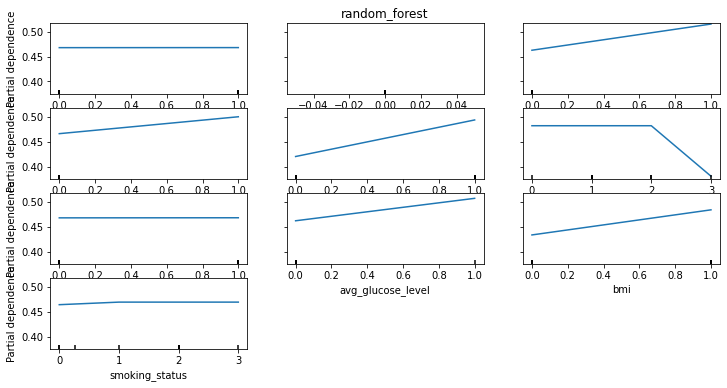

In [88]:
plot_dependencing(model1,x_train2,"random_forest",features=x_train2.columns)

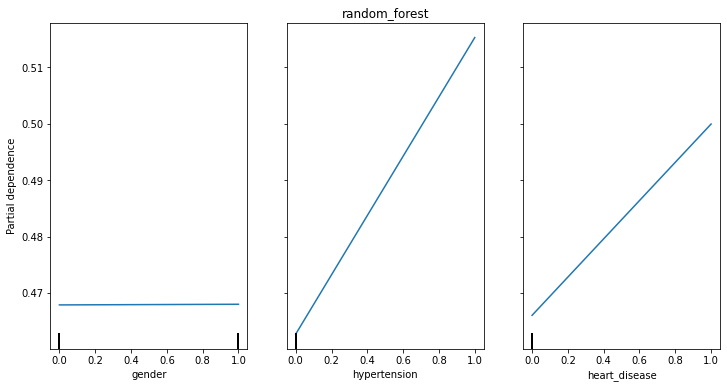

In [89]:
plot_dependencing(model1,x_train2,"random_forest",features=['gender','hypertension','heart_disease'])

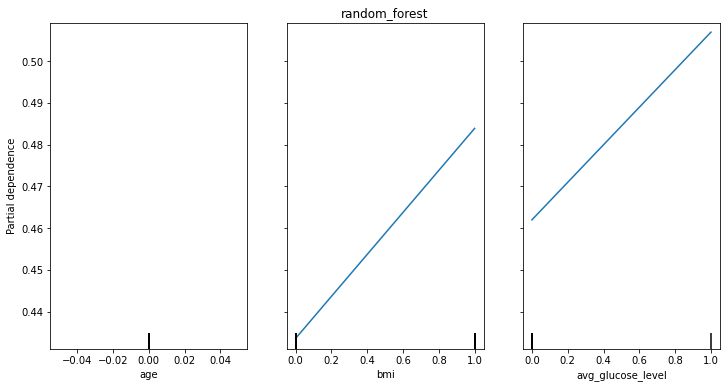

In [90]:
plot_dependencing(model1,x_train2,"random_forest",features=['age','bmi','avg_glucose_level'])

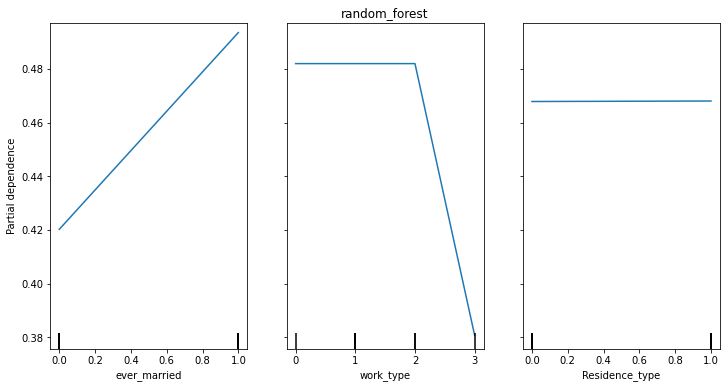

In [93]:
plot_dependencing(model1,x_train2,"random_forest",features=['ever_married','work_type','Residence_type'])

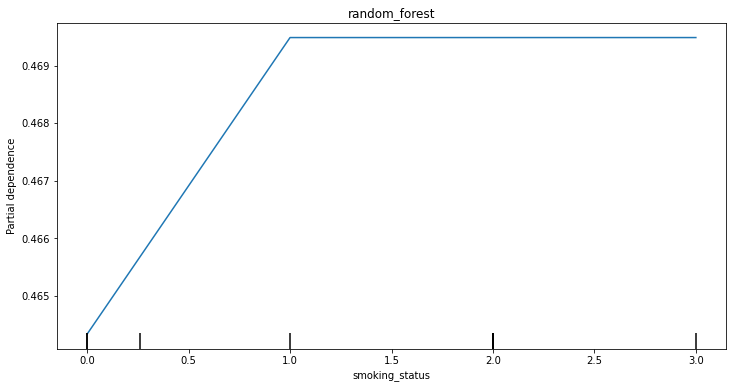

In [94]:
plot_dependencing(model1,x_train1,"random_forest",features=['smoking_status'])

# Test with smoted data

In [ ]:
x_test_resampled2,y_test_resampled2,resampler2=resampling_data(x_test,y_test2,"SMOTE")
sum_up=evaluation_of_model(model1,x_test_resampled2,y_test_resampled2,"Random_numvar_data_smoted_9_08",model_resume)

# Random Model With just numerical var categorized 

In [75]:
cat_data=df2[['age','bmi','avg_glucose_level','stroke']]

In [76]:
x_train2,x_test2,y_train2,y_test2=separation_of_train_test(cat_data,"stroke",size_=0.3)

In [77]:
model2=compute_model("rdf",x_train2,y_train2)
sum_up=evaluation_of_model(model2,x_test2,y_test2,"Rdf_num_categ_8_08",model_resume)

Do you want to enter the params. Y/Nn
              precision    recall  f1-score   support

           0       0.97      0.31      0.47      1421
           1       0.06      0.78      0.10        74

    accuracy                           0.34      1495
   macro avg       0.51      0.55      0.29      1495
weighted avg       0.92      0.34      0.45      1495



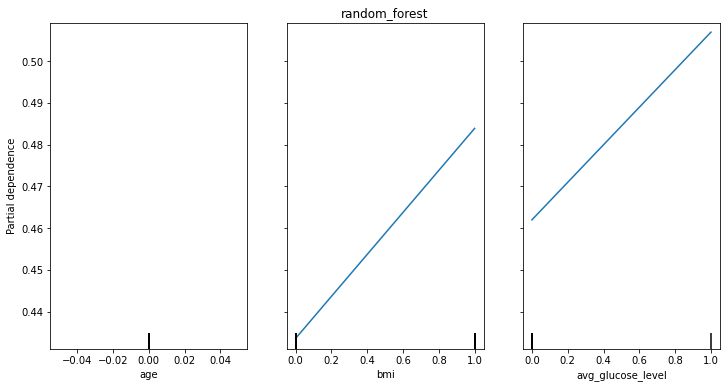

In [96]:
plot_dependencing(model1,x_train1,"random_forest",features=['age','bmi','avg_glucose_level'])

# Test with smoted data

In [ ]:
x_test_resampled2,y_test_resampled2,resampler2=resampling_data(x_test,y_test2,"SMOTE")
sum_up=evaluation_of_model(model2,x_test_resampled2,y_test_resampled2,"Random_numvar_data_smoted_9_08",model_resume)